<a href="https://colab.research.google.com/github/ahmetcanerdem/Bil470Proje/blob/master/Network%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install  kaggle
import tensorflow as tf
from google.colab import files

from IPython.display import clear_output

In [2]:
#clear_output()
#files.upload()
#!cd drive
#!cd "My Drive"
#!mkdir data
#!cd data
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

In [3]:
#! kaggle competitions download -c siim-isic-melanoma-classification
#clear_output()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#! mkdir train_t
#! unzip "*.dcm.zip" -d train

#clear_output()

In [6]:
#!pip install pydicom
#import pydicom as dicom
import matplotlib.pyplot as plt
clear_output()

In [7]:
#image_path = './train/ISIC_0015719.dcm'
#ds = dicom.dcmread(image_path)

#plt.imshow(ds.pixel_array)

In [8]:
#ds.PatientID[1:-1]

In [9]:
import os
from PIL import Image
import numpy as np

In [101]:
input_size=(256,256)
test_path=''
training_path='./drive/My Drive/train/'
train_0_p=training_path+'train_0/'
train_1_p=training_path+'train_1_large/'
treshold=0.85

In [11]:
DATA=[]
classvector=[]
c=0
first=0;
second=0;
for i in os.listdir(train_0_p):
  clear_output(wait=True)
  print(c)
  c= c+1
  first=first+1;
  path= train_0_p + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA.append(im)
  classvector.append(0)
  if(first>500):
    break
  if (c>1000):
    break;
DATA[0]

print("0 verisi bitti, 1 verisi alınıyor")
for i in os.listdir(train_1_p):
  clear_output(wait=True)
  print(c)
  c= c+1
  second=second+1
  path= train_1_p + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA.append(im)
  classvector.append(1)
  if(second>500):
    break
  if (c>1000):
    break;
print("Hasta olmayan verilerden :" + str(first) + " kadar alındı")
print("Hasta olan verilerden :" + str(second) + " kadar alındı")

998
Hasta olmayan verilerden :501 kadar alındı
Hasta olan verilerden :498 kadar alındı


In [12]:
DATA=np.reshape(DATA,newshape=(-1,input_size[0],input_size[1],3))

In [13]:
print(len(DATA))
print(len(classvector))

999
999


In [14]:
classvector=np.array(classvector)

In [15]:
#imdata=DATA*255
#imdata=np.array(imdata,dtype='uint8')
#plt.imshow(imdata[0])

In [16]:
model= tf.keras.Sequential([
                            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(input_size[0],input_size[1],3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')

])

In [17]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("Reached the %95 accuracy early stopping")
      self.model.stop_training=True;

callback=MyCallBack()

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        4

In [20]:
model.fit(DATA, classvector, epochs=300, callbacks=[callback])

Epoch 1/300
32/32 [==============================] - 5s 142ms/step - loss: 0.6950 - accuracy: 0.5285
Epoch 2/300
32/32 [==============================] - 4s 131ms/step - loss: 0.6659 - accuracy: 0.6066
Epoch 3/300
32/32 [==============================] - 4s 131ms/step - loss: 0.6453 - accuracy: 0.6376
Epoch 4/300
32/32 [==============================] - 4s 132ms/step - loss: 0.6630 - accuracy: 0.5916
Epoch 5/300
32/32 [==============================] - 4s 131ms/step - loss: 0.6714 - accuracy: 0.5726
Epoch 6/300
32/32 [==============================] - 4s 131ms/step - loss: 0.6369 - accuracy: 0.6486
Epoch 7/300
32/32 [==============================] - 4s 132ms/step - loss: 0.6249 - accuracy: 0.6577
Epoch 8/300
32/32 [==============================] - 4s 133ms/step - loss: 0.5924 - accuracy: 0.6817
Epoch 9/300
32/32 [==============================] - 4s 132ms/step - loss: 0.5950 - accuracy: 0.6527
Epoch 10/300
32/32 [==============================] - 4s 133ms/step - loss: 0.6531 - accura

In [ ]:
imdata=None

In [ ]:
#model.save('./mymodel.h5')

In [ ]:
#DATA=None

In [ ]:
#classvector=None

In [ ]:
im=None

In [162]:
treshold=0.875

In [163]:
DATA_TOTAL=[]
classvector_total=[]
c=0
first=0;
second=0;
for i in os.listdir('./drive/My Drive/test/train_0_test/'):
  #clear_output(wait=True)
  #print(c)
  c= c+1
  first=first+1;
  path='./drive/My Drive/test/train_0_test/' + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA_TOTAL.append(im)
  classvector_total.append(0)
  if(first>50):
    break
  if (c>100):
    break;
for i in os.listdir('./drive/My Drive/test/train_1_test/'):
  #clear_output(wait=True)
  #print(c)
  c= c+1
  path='./drive/My Drive/test/train_1_test/' + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA_TOTAL.append(im)
  classvector_total.append(1)
  if(second>50):
    break
  if (c>100):
    break;


In [164]:
DATA_TOTAL=np.reshape(DATA_TOTAL,newshape=(-1,input_size[0],input_size[1],3))

In [165]:
P=model.predict(DATA_TOTAL)

In [166]:
Z=[]
for i in P:
  if i>treshold:
    Z.append(1)
  else:
    Z.append(0)

In [167]:
c=0
for i in range(len(Z)):
  if(Z[i]==classvector_total[i]):
    c= c+1

In [168]:
print ("Toplam accuracy: "+ str(c/len(Z)))

Toplam accuracy: 0.825


In [169]:
##TRUE NEGATIVE RATE:
DATA_ZEROS=[]
classvector_zeros=[]
c=0
first=0;
second=0;
for i in os.listdir('./drive/My Drive/test/train_0_test/'):
  #clear_output(wait=True)
  #print(c)
  c= c+1
  first=first+1;
  path='./drive/My Drive/test/train_0_test/' + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA_ZEROS.append(im)
  classvector_zeros.append(0)
  if(first>50):
    break
  if (c>100):
    break;

DATA_ZEROS=np.reshape(DATA_ZEROS,newshape=(-1,input_size[0],input_size[1],3))
P=model.predict(DATA_ZEROS)
Z=[]
for i in P:
  if i>treshold:
    Z.append(1)
  else:
    Z.append(0)
c=0
for i in range(len(Z)):
  if(Z[i]==classvector_zeros[i]):
    c= c+1
print ("Accuracy in non melanoma: "+ str(c/len(Z)))

Accuracy in non melanoma: 0.7843137254901961


In [170]:
##TRUE POSITIVE RATE:
DATA_ONES=[]
classvector_ones=[]
c=0
first=0;
second=0;
for i in os.listdir('./drive/My Drive/test/train_1_test/'):
  #clear_output(wait=True)
  #print(c)
  c= c+1
  path='./drive/My Drive/test/train_1_test/' + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA_ONES.append(im)
  classvector_ones.append(1)
  if(second>50):
    break
  if (c>100):
    break;


DATA_ONES=np.reshape(DATA_ONES,newshape=(-1,input_size[0],input_size[1],3))
P=model.predict(DATA_ONES)
Z=[]
for i in P:
  if i>treshold:
    Z.append(1)
  else:
    Z.append(0)
c=0
for i in range(len(Z)):
  if(Z[i]==classvector_ones[i]):
    c= c+1
print ("Accuracy in melanoma: "+ str(c/len(Z)))

Accuracy in melanoma: 0.896551724137931


In [171]:

##Hangi olasılıktan sonra melanoma diyeceğime göre acuracy değişiyor. Doğru nokta 80% civarı gözüküyor ayrıca bu ihtimali her artırmamın true negative ve true positive e etkisi aynı olmuyor
##RAPORA BUNU KOYMALIYIZ


In [186]:
ACC_TOT=[]
ACC_TN=[]
ACC_TP=[]
P_T=model.predict(DATA_TOTAL)
P_0=model.predict(DATA_ZEROS)
P_1=model.predict(DATA_ONES)
trVECTOR=[]
for treshold_i in np.arange(0.4,1,0.025):
  Z_T=[]
  Z_0=[]
  Z_1=[]
  for i in P_T:
    if (i>treshold_i):
      Z_T.append(1)
    else:
      Z_T.append(0)
  c=0
  for i in range(len(Z_T)):
    if(Z_T[i]==classvector_total[i]):
      c= c+1
  ACC_TOT.append(c/len(Z_T))


  for i in P_0:
    if (i>treshold_i):
      Z_0.append(1)
    else:
      Z_0.append(0)
  c=0
  for i in range(len(Z_0)):
    if(Z_0[i]==classvector_zeros[i]):
      c= c+1
  ACC_TN.append(c/len(Z_0))


  for i in P_1:
    if (i>treshold_i):
      Z_1.append(1)
    else:
      Z_1.append(0)
  c=0
  for i in range(len(Z_1)):
    if(Z_1[i]==classvector_ones[i]):
      c= c+1
  ACC_TP.append(c/len(Z_1))


  trVECTOR.append(treshold_i)



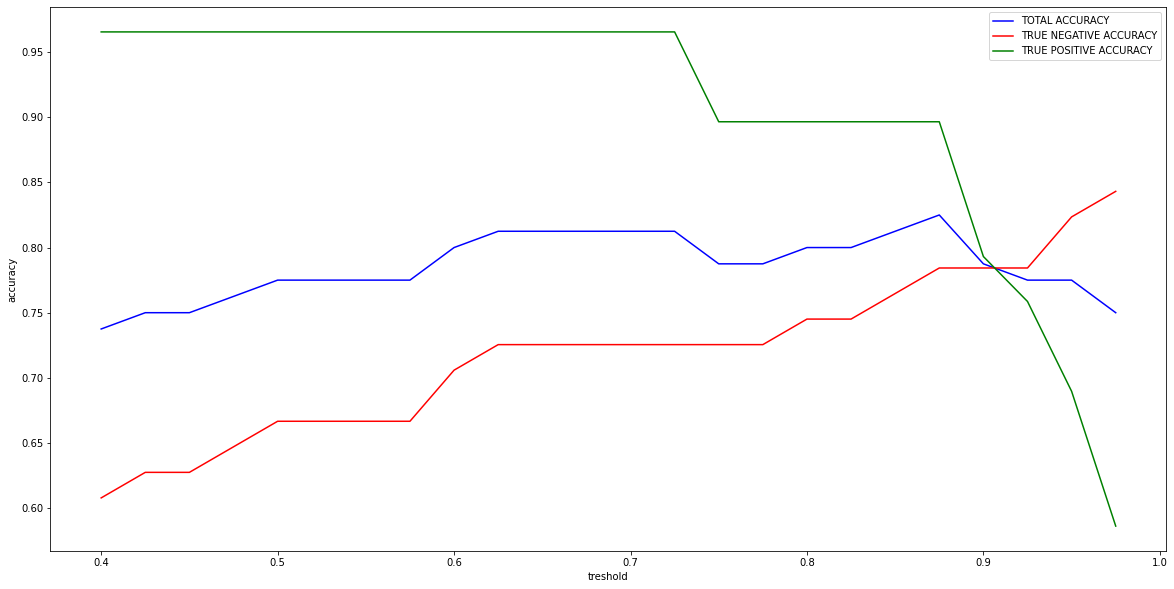

In [203]:
plt.figure(figsize=(20,10))
plt.ylabel('accuracy')
plt.xlabel('treshold')
plt.plot(trVECTOR,ACC_TOT,'b',label='TOTAL ACCURACY')
plt.plot(trVECTOR,ACC_TN, 'r',label='TRUE NEGATIVE ACCURACY')
plt.plot(trVECTOR,ACC_TP, 'g', label='TRUE POSITIVE ACCURACY')
plt.legend()
plt.show()